In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data (1).csv')
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [4]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


**Observations:**

1. No null values a
2. fair amount has an outlier that is very large than the 75th percentile
3. fair amount, extra, mta_tax, improvement_surcharge, total_amount have negative values which does not make sense
4. Unnamed: 0 is not useful remove it

In [5]:
num_cols = df.describe().columns
cat_cols = df.describe(include = object).columns

In [8]:
num_cols = num_cols[1:]

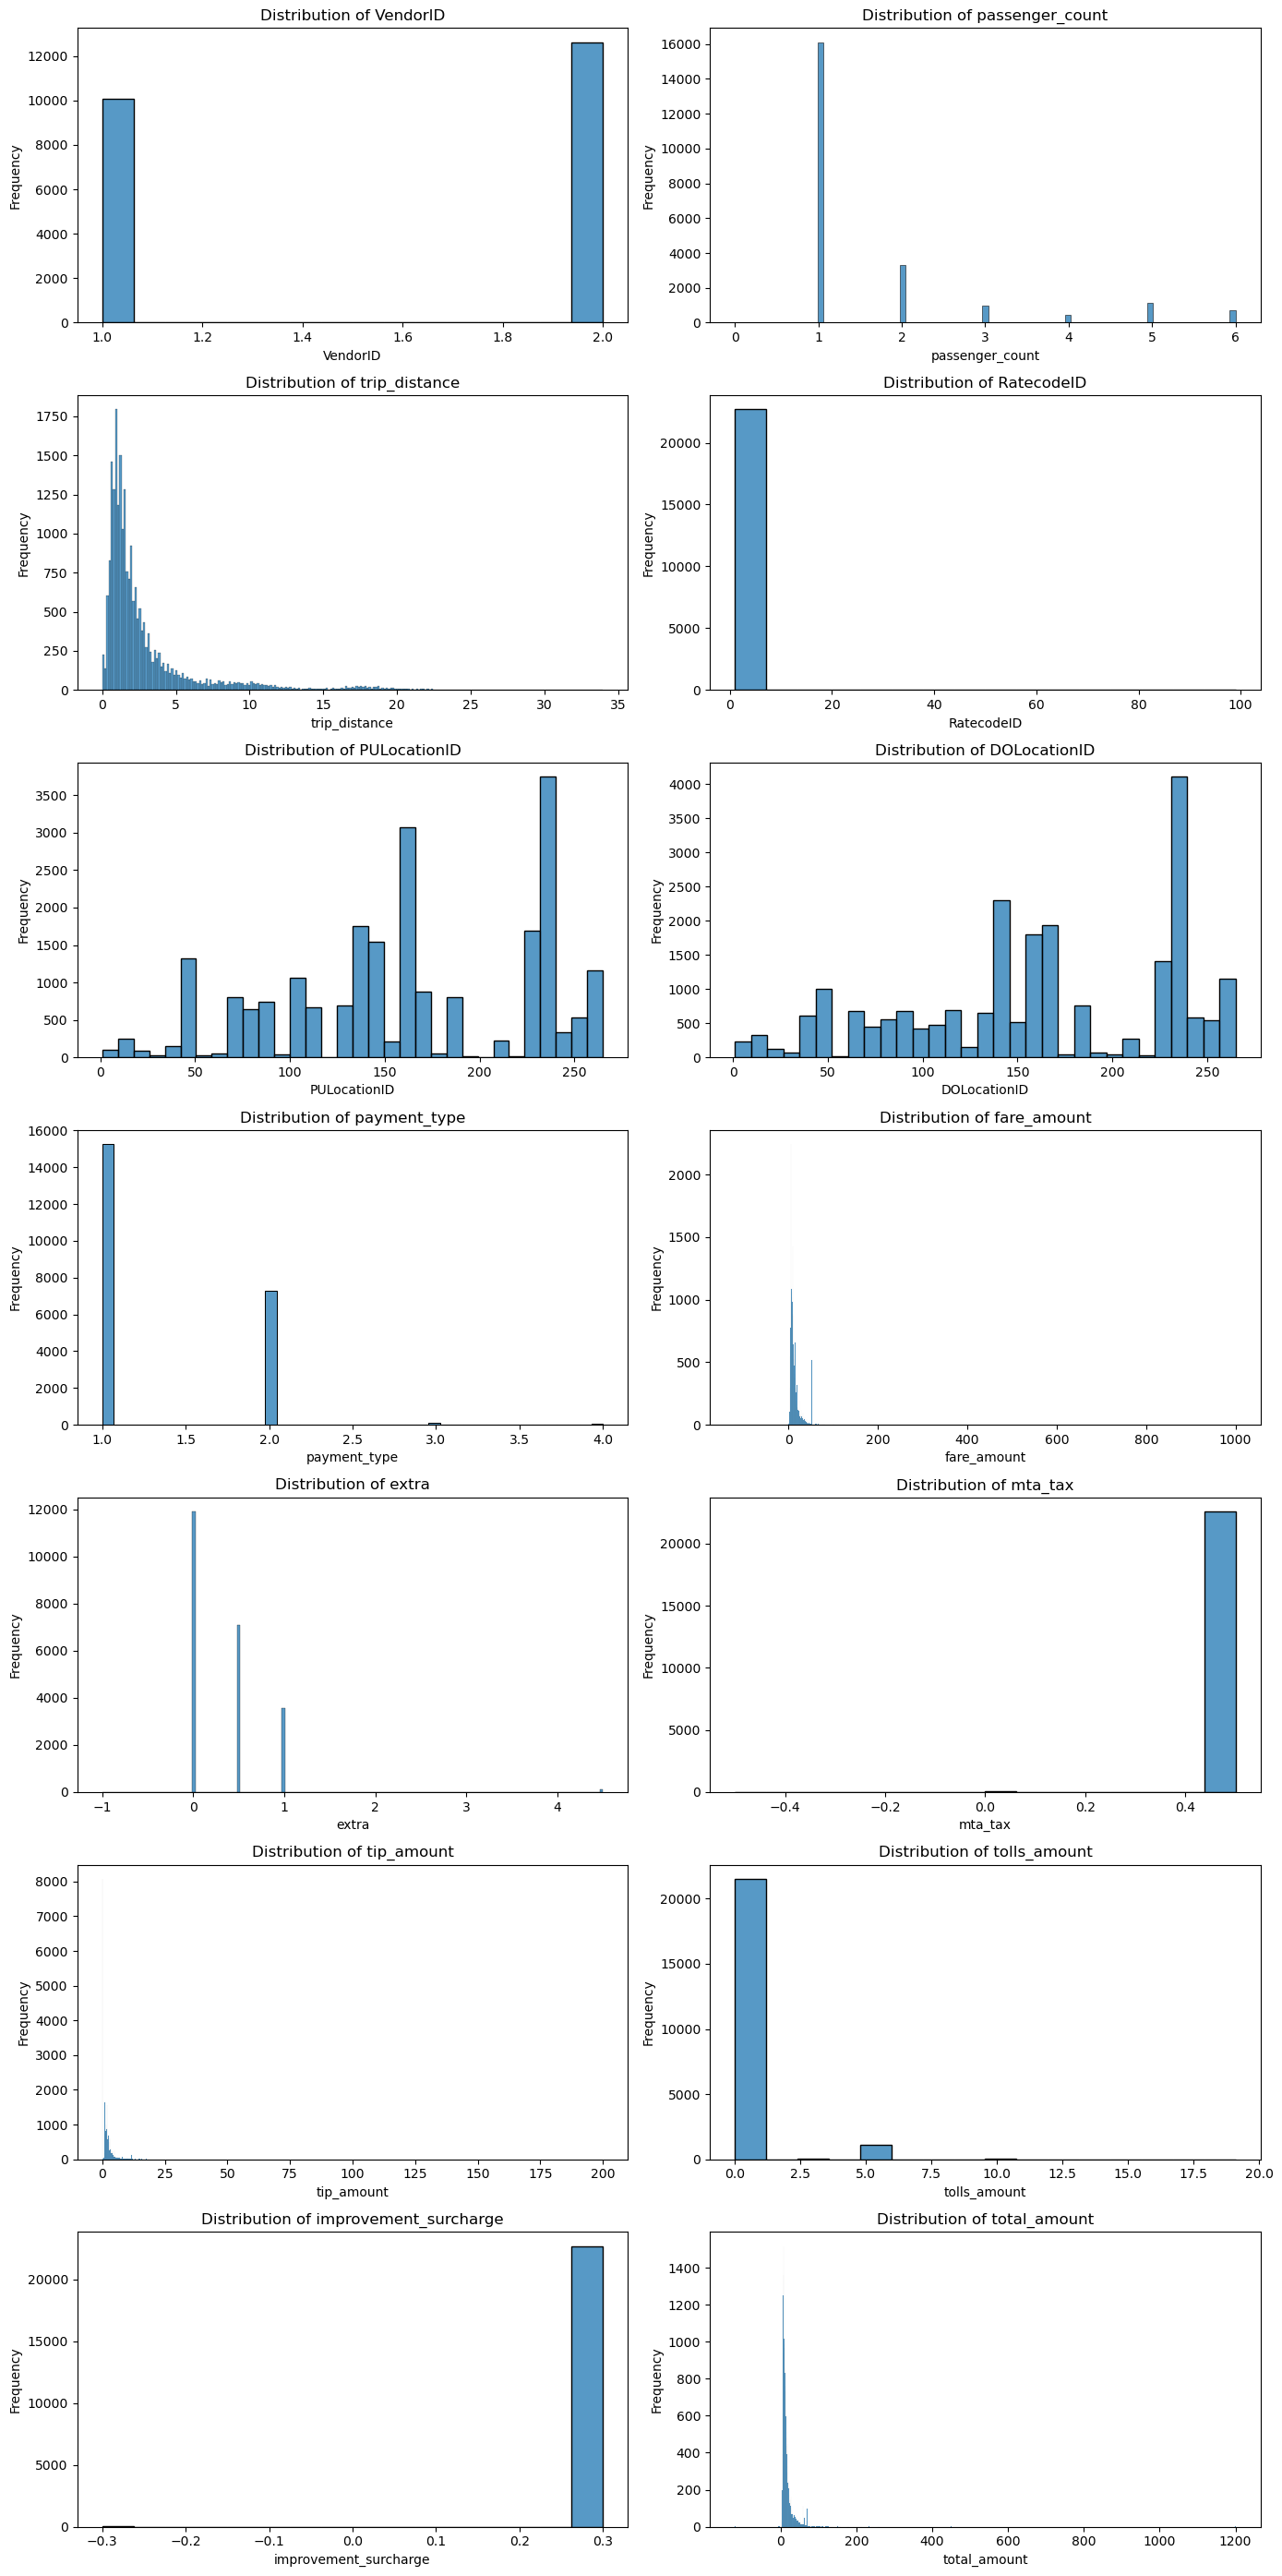

In [9]:
n = len(num_cols)
fig, axes = plt.subplots(nrows = 7,ncols=2, figsize=(14,28))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    ax = axes[i]  # Select the subplot
    sns.histplot(df[col],ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.tight_layout()

**Observations:**

1. Variables like improvement_surcharge,mta_tax, extra do not have much impact on price so remove them(based on domain knowledge)
2. trip_distance,fair_amount,total_amount,tip_amount is right skewed
3. RateCodeID has an unsual value of 99 when the possible values are [1,2,3,4,5,6] .
4. Most trips have a single passenger.
5. most trips have credit card payment type.

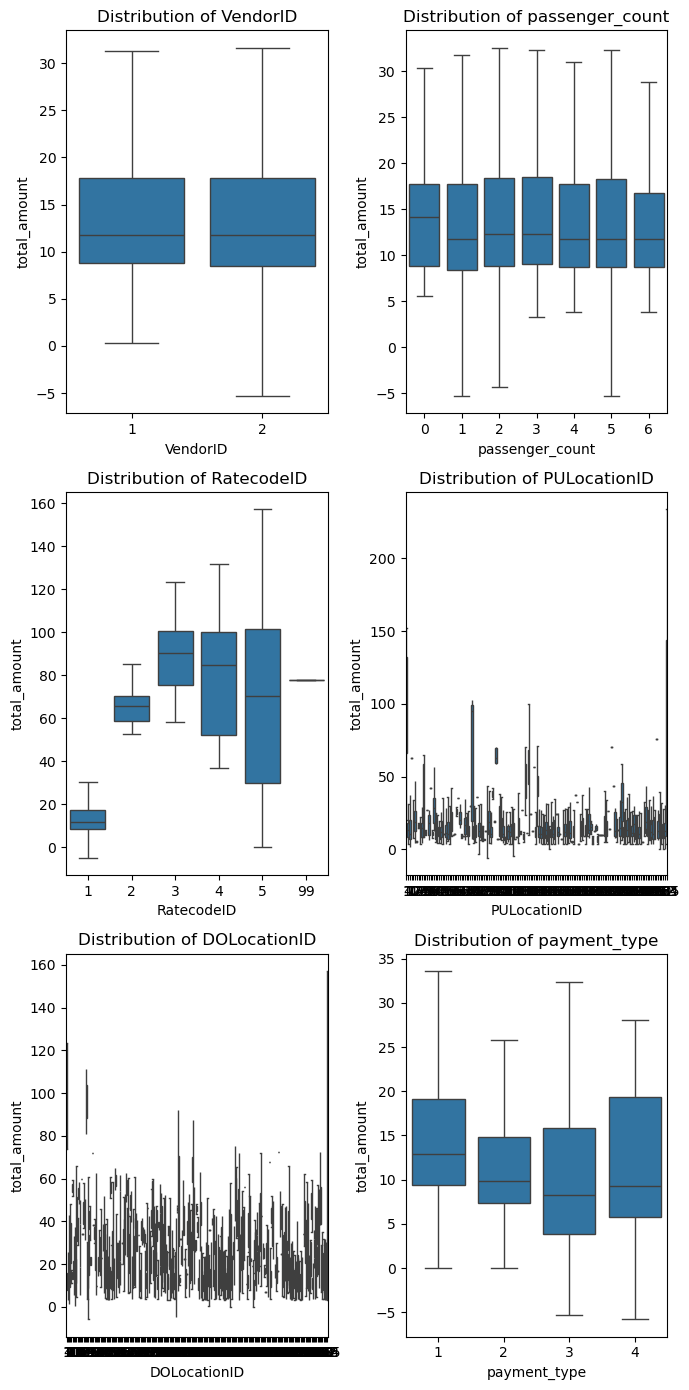

In [10]:
cols = ['VendorID','passenger_count','RatecodeID','PULocationID','DOLocationID','payment_type']
n = len(cols)
fig, axes = plt.subplots(nrows = 3,ncols=2, figsize=(7,14))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]  # Select the subplot
    sns.boxplot(x = df[col],y=df['total_amount'],showfliers=False,ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('total_amount')
plt.tight_layout();

**bservations:**

1. Both the vendors have the same average of total_amount so VendorID is not a good predictor.
2. The total_amount seems to be independent of passenger count and some have value 0 which might be due to trip cancellation can remove those.
3. trip distance shows a linear relation with the total_amount, so it is a good predictor .
4. The trips to Newark(3),JFK(2),Nassau or Westchester(4), negotiated fare(5) have high total_amounts compared to standard rate.
5. It can be seen that few of the pickup and drop off locations have high total_amounts(>$50)
6. It can be seen that there is a difference in total_amount among different payment methods. Later we will test whether this differece is significant

In [12]:
df.groupby(['PULocationID']).agg({'total_amount':'mean'}).sort_values(by='total_amount',ascending=False).head(10)


,total_amount
PULocationID,
265,107.750000
1,94.850000
258,75.940000
216,70.260000
70,64.672000
10,63.060000
135,56.770000
93,56.678571
132,54.995827


In [13]:
df.groupby(['DOLocationID']).agg({'total_amount':'mean'}).sort_values(by='total_amount',ascending=False).head(20)

,total_amount
DOLocationID,
1,96.814118
23,96.140000
265,82.903000
219,72.300000
29,71.760000
210,67.550000
132,60.947925
18,59.800000
51,59.453333


In [11]:
df[df['trip_distance']==0] # some trip distances are 0 maybe the distance is less than a mile

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
128,52987734,1,06/22/2017 8:05:33 AM,06/22/2017 8:05:40 AM,1,0.0,3,N,231,231,2,20.0,0.0,0.0,0.00,0.0,0.3,20.30
246,78660848,1,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80
291,83480088,1,10/04/2017 7:46:24 PM,10/04/2017 7:46:50 PM,1,0.0,1,N,132,132,2,2.5,1.0,0.5,0.00,0.0,0.3,4.30
319,14024301,1,02/22/2017 4:01:44 AM,02/22/2017 4:01:53 AM,1,0.0,1,N,90,90,3,2.5,0.5,0.5,0.00,0.0,0.3,3.80
424,3767951,1,01/14/2017 7:00:26 AM,01/14/2017 7:00:53 AM,1,0.0,1,N,208,208,1,2.5,0.0,0.5,6.70,0.0,0.3,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22190,87078850,1,10/16/2017 8:34:07 AM,10/16/2017 8:34:10 AM,1,0.0,1,N,132,132,3,2.5,0.0,0.5,0.00,0.0,0.3,3.30
22325,62192517,2,07/21/2017 11:30:29 PM,07/21/2017 11:31:12 PM,1,0.0,5,N,163,163,1,16.8,0.0,0.0,3.42,0.0,0.3,20.52
22383,113244949,2,01/07/2017 4:48:42 AM,01/07/2017 4:51:03 AM,1,0.0,5,N,55,55,2,10.0,0.0,0.0,0.00,0.0,0.3,10.30
22566,19022898,2,03/07/2017 2:24:47 AM,03/07/2017 2:24:50 AM,1,0.0,1,N,264,193,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00


In [14]:
# checking effects on tip_amount
for col in cols:
    print(df.groupby([col]).agg({'tip_amount':'mean'}))

          tip_amount
VendorID            
1            1.83725
2            1.83461
                 tip_amount
passenger_count            
0                  2.135758
1                  1.848920
2                  1.856378
3                  1.716768
4                  1.530264
5                  1.873185
6                  1.720260
            tip_amount
RatecodeID            
1             1.669099
2             7.435497
3             9.452564
4             3.633750
5             9.136029
99            0.000000
              tip_amount
PULocationID            
1               6.216667
4               1.351833
7               1.043784
10              0.000000
12              0.750000
...                  ...
261             1.991692
262             1.711467
263             1.541199
264             2.080696
265             8.599286

[152 rows x 1 columns]
              tip_amount
DOLocationID            
1              11.097059
4               1.525842
7               2.269101
9     

**Observations:**

1. some trip distances are 0 maybe the distance is less than a mile
2. Trips to/from some locations have high tips
3. trips to Newark/JFK have high tip amounts
4. trips with paymnet_type credit card have high tips then remaining.
5. Vendor Passenger count do not effect tip amount that much.

### Exploring changes with time

In [15]:
# Convert data columns to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday


/var/folders/mh/p31c9s4j7x96gcg6jjhwgmd00000gn/T/ipykernel_54177/753070610.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set_xticklabels(month_order,rotation=45)
/var/folders/mh/p31c9s4j7x96gcg6jjhwgmd00000gn/T/ipykernel_54177/753070610.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_xticklabels(day_order)
/var/folders/mh/p31c9s4j7x96gcg6jjhwgmd00000gn/T/ipykernel_54177/753070610.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,0].set_xticklabels(month_order,rotation=45)
/var/folders/mh/p31c9s4j7x96gcg6jjhwgmd00000gn/T/ipykernel_54177/753070610.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,1].set_xtickla

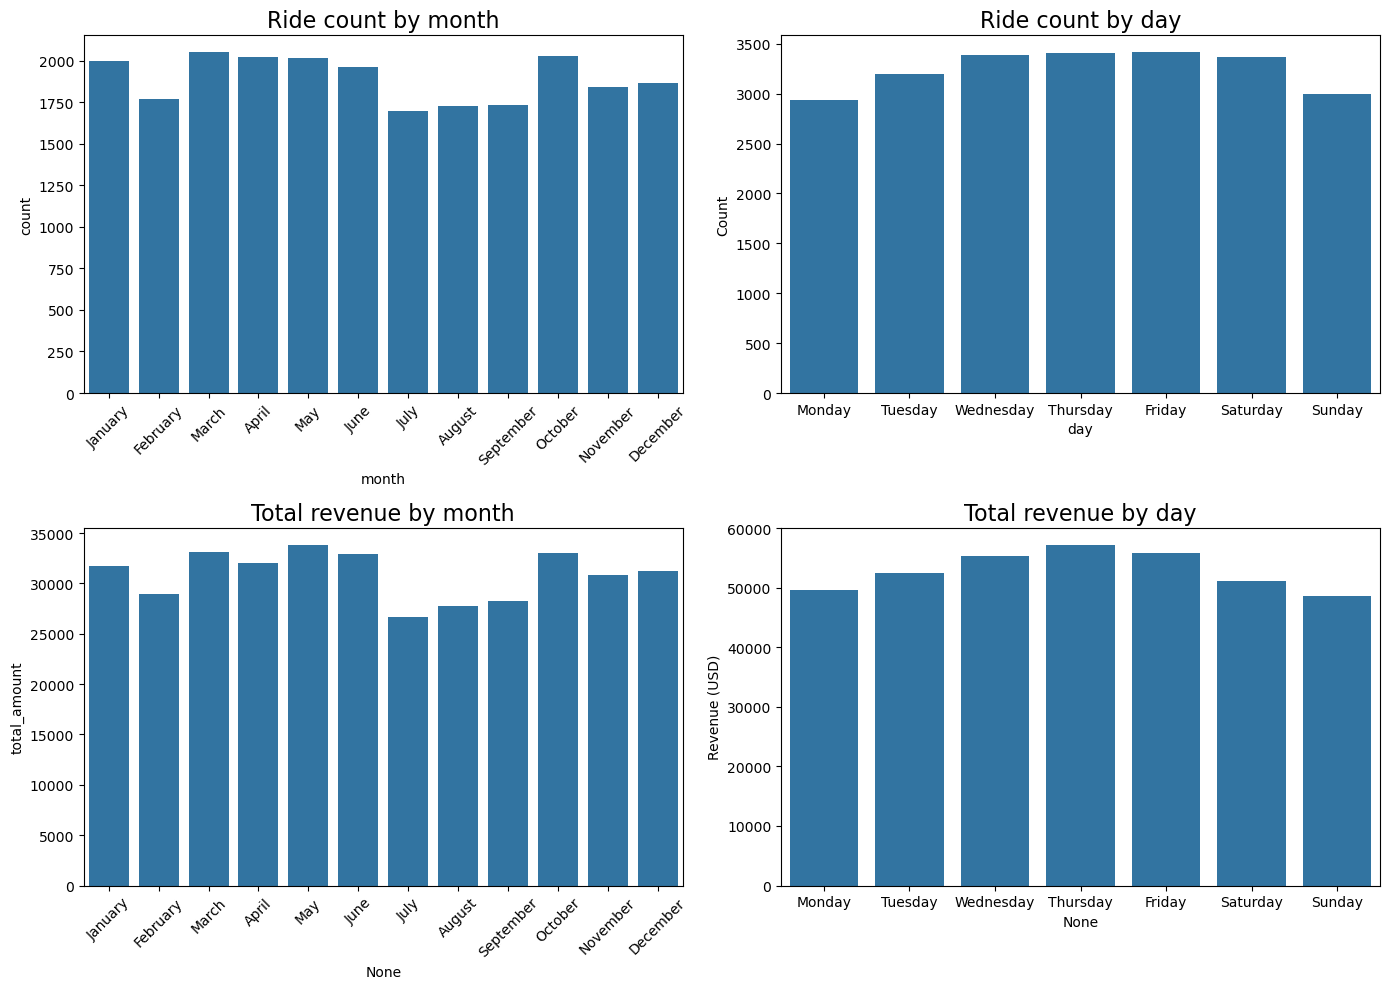

In [16]:
# Some visualisations

fig,ax = plt.subplots(2,2,figsize=(14,10))

# total no.of rides per month
monthly_rides = df['month'].value_counts()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']
monthly_rides = monthly_rides.reindex(index=month_order)
# Create a bar plot of total rides per month
sns.barplot(x=monthly_rides.index, y=monthly_rides,ax=ax[0,0])
ax[0,0].set_xticklabels(month_order,rotation=45)
ax[0,0].set_title('Ride count by month', fontsize=16)

#total no.of rides by day
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
# Create bar plot for ride count by day
sns.barplot(x=daily_rides.index, y=daily_rides,ax=ax[0,1])
ax[0,1].set_xticklabels(day_order)
ax[0,1].set_ylabel('Count')
ax[0,1].set_title('Ride count by day', fontsize=16)

# total revenue by month
total_amount_month = df.groupby('month')['total_amount'].sum().reset_index()
total_amount_month = total_amount_month.set_index('month').reindex(month_order).reset_index()
# Create a bar plot of total revenue by month
sns.barplot(x=total_amount_month.index, y=total_amount_month['total_amount'],ax=ax[1,0])
ax[1,0].set_xticklabels(month_order,rotation=45)
ax[1,0].set_title('Total revenue by month', fontsize=16)

# Total revenue by day
total_amount_day = df.groupby('day')['total_amount'].sum().reset_index()
total_amount_day = total_amount_day.set_index('day').reindex(index=day_order).reset_index()
# Create bar plot of total revenue by day
sns.barplot(x=total_amount_day.index, y=total_amount_day['total_amount'],ax=ax[1,1])
ax[1,1].set_xticklabels(day_order)
ax[1,1].set_ylabel('Revenue (USD)')
ax[1,1].set_title('Total revenue by day', fontsize=16)
plt.tight_layout()

**Observations:**
1. Monthly rides are fairly consistent, with notable dips in the summer months of July, August, and September, and also in February.
2. Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.
3. Monthly revenue generally follows the pattern of monthly rides, with noticeable dips in the summer months of July, August, and September, and also one in February.
4. Thursday had the highest gross revenue of all days, and Sunday and Monday had the least. Interestingly, although Saturday had only 35 fewer rides than Thursday, its gross revenue was less than Thursday's—more than a 10% drop.

### Hypothesis Testing

In [17]:
df.groupby('payment_type').agg({'fare_amount':'mean'})

,fare_amount
payment_type,
1,13.429748
2,12.213546
3,12.186116
4,9.913043


We can obeserve that the fare amount for creditcards payments are more than cash payments. Let's test this hypothesis.

H0 :  There is no difference in average fare between customers who use credit cards and customers who use cash

H1 :  There is a difference in average fare between customers who use credit cards and customers who use cash

Conduct two-sample t-test with the standard 0.05 significance level

In [18]:
from scipy import stats

a = df[df['payment_type']==1]['fare_amount'] # credit_card
b = df[df['payment_type']==2]['fare_amount'] # cash
stats.ttest_ind(a=a,b=b,equal_var=False)

TtestResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12, df=16675.48547403633)

**the p-value < 0.05 => Reject NULL hypothesis** =>  there is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.

This insight is useful under the assumption that the passengers were forced to pay one way or the other. This dataset does not account for other likely explanations. For example, riders might not carry lots of cash, so it's easier to pay for longer/farther trips with a credit card. In other words, it's far more likely that fare amount determines payment type, rather than vice versa.

Next we will perform different modeling techniques to answer different business questions

In [20]:
df.to_csv('dataafterEDA.csv',index=False)